# Loading Data

csv file uploaded on google Drive:
Link: https://drive.google.com/file/d/1_PojWqURqHpbKKef1765Vfgr-7rXggHV/view?usp=drive_link


In [21]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/heart.csv')

In [23]:
# to visit 5 first rows
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [24]:
# get infomation of column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
# get descriptions of column
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


# Preprocessing

1. Split data to x and y

---



*   x is data
*   y is label




In [26]:
x = df.drop('HeartDisease', axis = 1) # axis = 1 because we want column or we can use axis = column
y = df['HeartDisease']

2. Label encoder
---
some columns have non numerical data like "sex" and "ChestPainType" etc. In addition to continu we need numerical data.
Therefore to convert was utilized **"LabelEncoder"** from **"sklearn.preprocessing"**.


```
from sklearn.preprocessing import LabelEncoder
```






In [27]:

from sklearn.preprocessing import LabelEncoder
x = x.apply(LabelEncoder().fit_transform)


x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


3. Split data to **"Train"** and **"Test"**

---
In this step we need to have **"Train"** and **"Test"** data for training algorithm and test that by known samples and labels. Thus data was splited to **"Train"** and **"Test"** .

*   **test_size:** 20 percent of all data divided for test data.
*   **random_state:** a parameter in `train_test_split` that controls the random number generator used to shuffle the data before splitting it.




In [28]:
from sklearn.model_selection import train_test_split

train_features, train_labels, test_features, test_labels = train_test_split(x, y, test_size = 0.2, random_state = 42)


4. convert data to matrix

---

In this step we have to use numerical matrix to continu and analysis. Therefore through `np.array(selected data)` was coverted to numerical matrix.


In [29]:
import numpy as np
train_features = np.array(train_features)
train_labels = np.array(train_labels)
test_features = np.array(test_features)
test_labels = np.array(test_labels)

5. Normalize Data:

---
normalize data in range (0, 1) because prevent to invalid attention to outliers through `MinMaxScaler` that imported from `sklearn.preprocessing` library.


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train_features = scaler.fit_transform(train_features)
train_labels = scaler.transform(train_labels)

# Model definition

1. Importing needed library


---






In [31]:
import tensorflow as tf
from tensorflow import keras

2. Model

---
* Sequential groups a linear stack of layers into a Model.


```
# model = keras.Sequential()
```

* **Input layer:**
  * Input layer have to shape = 11 because **Train Data Frame** have 11 columns



```
# model.add(keras.layers.Input(shape = (11, )))
```

* **Dense layers:**

  *   Units = 128; counts of nodes.
  *  activation = relu; becausse in every layers we want value of node between zero and positive infinity.

* **Dropout layer:**
  * to prevent overfit we delete some nodes of layer through **Dropout**, In additon to prevent invalid attention to large amount of nodes,
  it's possible because number of nodes is very lage and by dropout some of them doesn't change any thing.
  * `Dropout(0.3)` = 30 percents of node **Dropout**


* **Last layer(output):**
  * Units = 1; we need 1 node because output is True and False
  * activation = sigmoid; because out put between 0 and 1.


In [32]:
model = keras.Sequential()

model.add(keras.layers.Input(shape = (11, )))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(units = 128, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'sigmoid'))



3. Compile

---
* **optimizer** = Adam


* **Loss function** = `losses.binary_crossentropy`
  * because we have to binary output True and False
* **metrics** = accuracy
  * to show persontage of validty

In [33]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = tf.losses.binary_crossentropy,
              metrics = ['accuracy'])

4. Summary

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1536      
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

5. Fit Model

---

*   Fitting model of train and test data `model.fit(train_features, test_features)`

*   **epochs** = 60; epochs is numbers of algorithm will be run

* **batch_size** = 128: batch_size is numbers of inputs that enter in algorithm for example in this case data enter to algorithm in batch with 128 samples.


In [35]:
hist = model.fit(train_features, test_features, epochs = 60, batch_size = 128, validation_data = [train_labels, test_labels])

Epoch 1/60
6/6 [==============================] - 2s 43ms/step - loss: 0.6757 - accuracy: 0.5681 - val_loss: 0.6432 - val_accuracy: 0.6304
Epoch 2/60
6/6 [==============================] - 0s 10ms/step - loss: 0.6269 - accuracy: 0.6512 - val_loss: 0.5710 - val_accuracy: 0.7989
Epoch 3/60
6/6 [==============================] - 0s 13ms/step - loss: 0.5595 - accuracy: 0.7262 - val_loss: 0.4788 - val_accuracy: 0.8261
Epoch 4/60
6/6 [==============================] - 0s 12ms/step - loss: 0.4674 - accuracy: 0.8202 - val_loss: 0.4340 - val_accuracy: 0.7880
Epoch 5/60
6/6 [==============================] - 0s 10ms/step - loss: 0.4342 - accuracy: 0.8174 - val_loss: 0.4277 - val_accuracy: 0.8098
Epoch 6/60
6/6 [==============================] - 0s 13ms/step - loss: 0.4097 - accuracy: 0.8351 - val_loss: 0.4246 - val_accuracy: 0.8098
Epoch 7/60
6/6 [==============================] - 0s 13ms/step - loss: 0.4016 - accuracy: 0.8324 - val_loss: 0.4052 - val_accuracy: 0.8261
Epoch 8/60
6/6 [===========

# Evaluation

In [36]:
model.evaluate(train_labels, test_labels)

6/6 [==============================] - 0s 4ms/step - loss: 0.3152 - accuracy: 0.9130


[0.3152201771736145, 0.9130434989929199]

# Plot

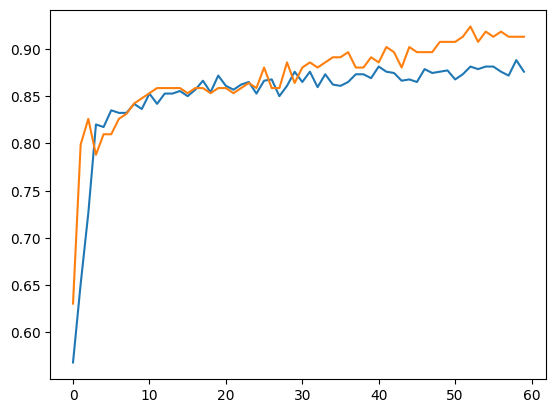

In [37]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

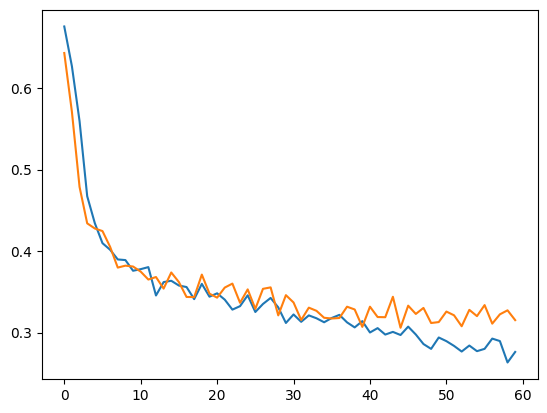

In [38]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In summary:
as we see, the best validation accuracy was near 91% additionally loss near 0.3 moreover in several times that i try with differnts epochs after 60 times overfit was viwed.